,Age group (years),Sex,Factors,predicted risk of Pulmonary Embolism,"predicted risk of Sudden Hearing Loss, No congenital anomaly or middle or inner ear conditions",predicted risk of Restless Leg Syndrome,"predicted risk of Sudden Vision Loss, with no eye pathology causes",predicted risk of Muscle weakness or injury,predicted risk of Ankylosing Spondylitis,predicted risk of Autoimmune hepatitis,predicted risk of Multiple Sclerosis,"predicted risk of Acute pancreatitis, with No chronic or hereditary or common causes of pancreatitis",predicted risk of Ulcerative colitis,predicted risk of Migraine,predicted risk of Dementia,predicted risk of Treatment resistant depression (TRD),"predicted risk of Parkinson's disease, inpatient or with 2nd diagnosis"
personId,,,,,,,,,,,,,,,,,
1,5-9,Female,"['Acetaminophen exposures in prior year', 'Hem...",0.000007,0.001188,0.001135,0.000112,0.018832,0.000076,0.000080,0.000469,0.000124,0.000231,0.006544,0.000073,0.000394,0.000040
2,80-84,Male,"['Seizure in prior year', 'Sleep apnea in prio...",0.004414,0.035826,0.006286,0.001607,0.179579,0.000502,0.000008,0.000421,0.000817,0.001567,0.024364,0.283879,0.013889,0.019553
3,45-49,Male,['Coronary artery disease (CAD) in prior year'...,0.002462,0.003524,0.001240,0.000146,0.022318,0.000462,0.000023,0.000527,0.000417,0.001275,0.005430,0.001282,0.001017,0.000113
4,30-34,Male,"['Occurrence of Anxiety in prior year', 'Antib...",0.002670,0.002473,0.000441,0.000153,0.022062,0.000482,0.000034,0.000911,0.000236,0.006386,0.006637,0.000707,0.002266,0.000041
5,60-64,Other,"['ANTIEPILEPTICS in prior year', 'Type 1 diabe...",0.020682,0.011789,0.004277,0.000326,0.063311,0.004115,0.000083,0.001859,0.000700,0.062065,0.004683,0.016372,0.000056,0.003312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,50-54,Female,"['Antibiotics Streptogramins in prior year', '...",0.002682,0.005175,0.003796,0.000198,0.018149,0.000411,0.000041,0.000423,0.000388,0.001664,0.012047,0.001152,0.001375,0.000154
97,5-9,Male,"['Hypertension in prior year', 'Occurrence of ...",0.000007,0.001084,0.000509,0.000045,0.008068,0.000520,0.000011,0.000036,0.000089,0.000385,0.000700,0.000016,0.000191,0.000030
98,90-94,Male,"['Antibiotics Monobactams in prior year', 'Ost...",0.012757,0.018546,0.001657,0.000597,0.217159,0.001261,0.000092,0.000219,0.002008,0.002333,0.000461,0.303624,0.000485,0.002572


predicted risk of Pulmonary Embolism                                                                    0.021271
predicted risk of Sudden Hearing Loss, No congenital anomaly or middle or inner ear conditions          0.049426
predicted risk of Restless Leg Syndrome                                                                 0.007200
predicted risk of Sudden Vision Loss, with no eye pathology causes                                      0.001607
predicted risk of Muscle weakness or injury                                                             0.217159
predicted risk of Ankylosing Spondylitis                                                                0.004115
predicted risk of Autoimmune hepatitis                                                                  0.002155
predicted risk of Multiple Sclerosis                                                                    0.004457
predicted risk of Acute pancreatitis, with No chronic or hereditary or common causes of pancreat

                          predicted risk of Dementia
Age group (years) Sex                               
00-04             Female                           3
                  Male                             2
05-09             Female                           2
                  Male                             1
                  Other                            1
15-19             Female                           2
                  Male                             2
                  Other                            1
20-24             Female                           3
                  Male                             6
                  Other                            2
25-29             Male                             4
30-34             Female                           1
                  Male                             2
35-39             Female                           1
                  Male                             4
40-44             Male                        

C:\Users\eam565\AppData\Local\Temp\ipykernel_10440\4053882723.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = grouped.mean().sort_index().reset_index()


Sex,Female,Male,Other
Age group (years),,,
00-04,0.000092,0.000052,NaN
05-09,0.000084,0.000016,0.000040
15-19,0.000304,0.000075,0.000058
20-24,0.000388,0.000381,0.000365
25-29,NaN,0.000560,NaN
30-34,0.000130,0.000401,NaN
35-39,0.000227,0.000760,NaN
40-44,NaN,0.000493,0.008307
45-49,0.002651,0.000669,NaN


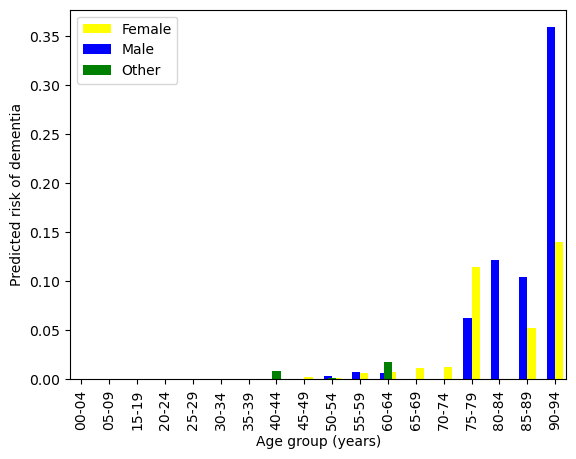

In [42]:
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

short_data = pd.read_csv('short_data.csv').drop('Unnamed: 0', axis=1).set_index('personId')
ipd.display(short_data)
use_short = short_data.drop(['Factors','Age group (years)','Sex'], axis=1).max() 
ipd.display(use_short) #the greatest predicted risk of any given condition is dementia
#Predicted risk of dementia will be the focus for this visualisation
short_data['Age group (years)'] = short_data['Age group (years)'].replace(['0-4','5-9'],['00-04','05-09'])

print(short_data[['Age group (years)','Sex','predicted risk of Dementia']].groupby(['Age group (years)','Sex']).count())

grouped = short_data.groupby(['Age group (years)','Sex'])
grouped_means = grouped.mean().sort_index().reset_index()
grouped_means = grouped_means.set_index('Age group (years)')
grouped_means = grouped_means[['Sex','predicted risk of Dementia']]
grouped_means = grouped_means.pivot(columns='Sex', values='predicted risk of Dementia')
ipd.display(grouped_means) #NaN values are because there are no personId within that age/sex group (as shown by print in line 13)

fig=plt.figure()
ax=plt.axes()

grouped_means.Female.plot(kind='bar', color='yellow', position=0, width=0.3, label='Female') 
grouped_means.Male.plot(kind='bar', color='blue', position=1, width=0.3, label='Male')
grouped_means.Other.plot(kind='bar', color='green', width=0.3, label='Other')
plt.ylabel('Predicted risk of dementia')
plt.xlabel('Age group (years)')
plt.legend()#this plot excludes any personId without an age value